# 911 Calls - Kaggle Dataset
## Exploratory Data Analysis (First Data Set)

Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA

### Data and Setup

In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [39]:
df=pd.read_csv('911.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638530 entries, 0 to 638529
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        638530 non-null  float64
 1   lng        638530 non-null  float64
 2   desc       638530 non-null  object 
 3   zip        561009 non-null  float64
 4   title      638530 non-null  object 
 5   timeStamp  638530 non-null  object 
 6   twp        638254 non-null  object 
 7   addr       638530 non-null  object 
 8   e          638530 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.8+ MB


In [41]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Basic Data Insights

In [42]:
# Top 5 Zip Codes for 911 Calls
df.zip.value_counts().head()

19401.0    43685
19464.0    42081
19403.0    33524
19446.0    31032
19406.0    21612
Name: zip, dtype: int64

In [43]:
# Top 5 Townships for 911 Calls
df.twp.value_counts().head()

LOWER MERION    53608
ABINGTON        38484
NORRISTOWN      36019
UPPER MERION    34749
CHELTENHAM      29468
Name: twp, dtype: int64

In [44]:
# Number of Unique Acciden Descriptions (rough idea of number of accidents)
df.title.nunique()

147

### Creating new features

In [45]:
#Create Column with responder type - EMS, Fire, Traffic
df['responders']=df.title.apply(lambda x: x.split(':')[0])

In [135]:
#Create Column with responder reason eg: DIABETIC EMERGENCY
df['response_reason']=df['title'].str.split(':').str[1].str.replace('-','').str.strip()

In [136]:
#Most common type of assistance requested
df.responders.value_counts().head()

EMS        319520
Traffic    223071
Fire        95939
Name: responders, dtype: int64

In [140]:
#Most common reason for requested assitance
df.response_reason.value_counts()

VEHICLE ACCIDENT         179805
DISABLED VEHICLE          46486
FIRE ALARM                36771
FALL VICTIM               33100
RESPIRATORY EMERGENCY     32966
                          ...  
FOOT PATROL                   1
BARRICADED SUBJECT            1
PRISONER IN CUSTODY           1
HIT + RUN                     1
ANIMAL COMPLAINT              1
Name: response_reason, Length: 88, dtype: int64

In [60]:
df.timeStamp = pd.to_datetime(df['timeStamp'])
df.timeStamp

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
638525   2020-05-21 14:22:06
638526   2020-05-21 14:25:17
638527   2020-05-21 14:28:56
638528   2020-05-21 14:26:08
638529   2020-05-21 14:27:04
Name: timeStamp, Length: 638530, dtype: datetime64[ns]

In [61]:
df['hour'] = df.timeStamp.apply(lambda x:x.hour)
df['month'] = df.timeStamp.apply(lambda x:x.month)
df['day'] = df.timeStamp.apply(lambda x:x.dayofweek)
df['year']= df.timeStamp.apply(lambda x:x.year)

In [66]:
df.day

0         3
1         3
2         3
3         3
4         3
         ..
638525    3
638526    3
638527    3
638528    3
638529    3
Name: day, Length: 638530, dtype: int64

In [67]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day']=df.day.map(dmap)

In [68]:
df.day

0         Thu
1         Thu
2         Thu
3         Thu
4         Thu
         ... 
638525    Thu
638526    Thu
638527    Thu
638528    Thu
638529    Thu
Name: day, Length: 638530, dtype: object

### Visualising and Investigating Data

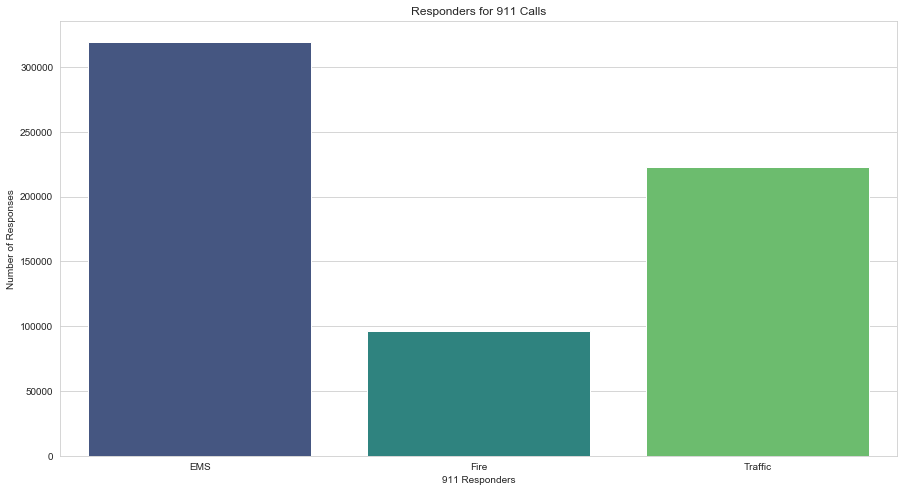

In [55]:
plt.figure(figsize=(15,8))
countgraph = sns.countplot(df.responders,palette='viridis')
countgraph.set_title('Responders for 911 Calls')
countgraph.set_xlabel('911 Responders')
countgraph.set_ylabel('Number of Responses')
plt.show()

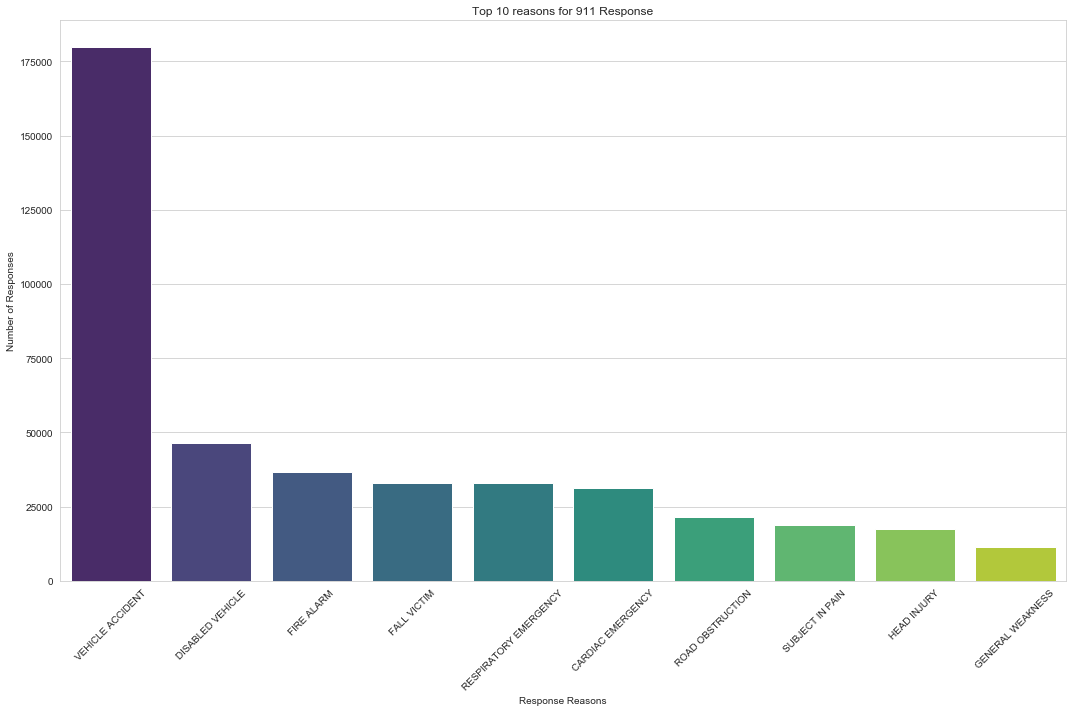

In [208]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(df.response_reason, order=df.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for 911 Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

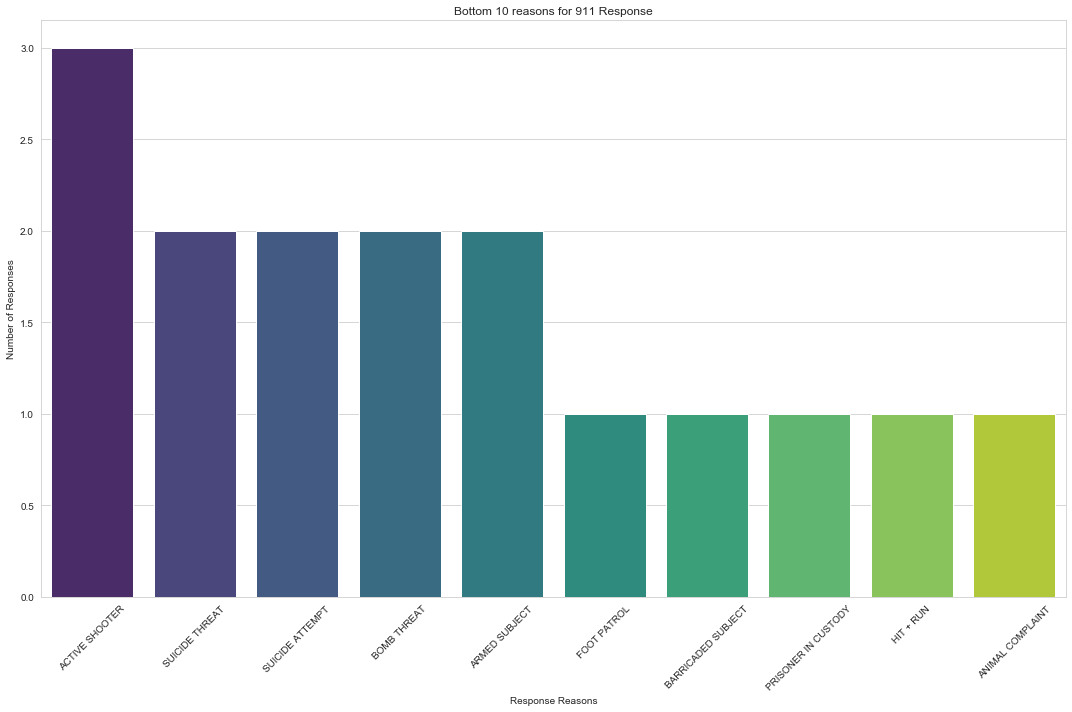

In [209]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(df.response_reason, order=df.response_reason.value_counts().iloc[-10:].index,palette='viridis')
countgraph.set_title('Bottom 10 reasons for 911 Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

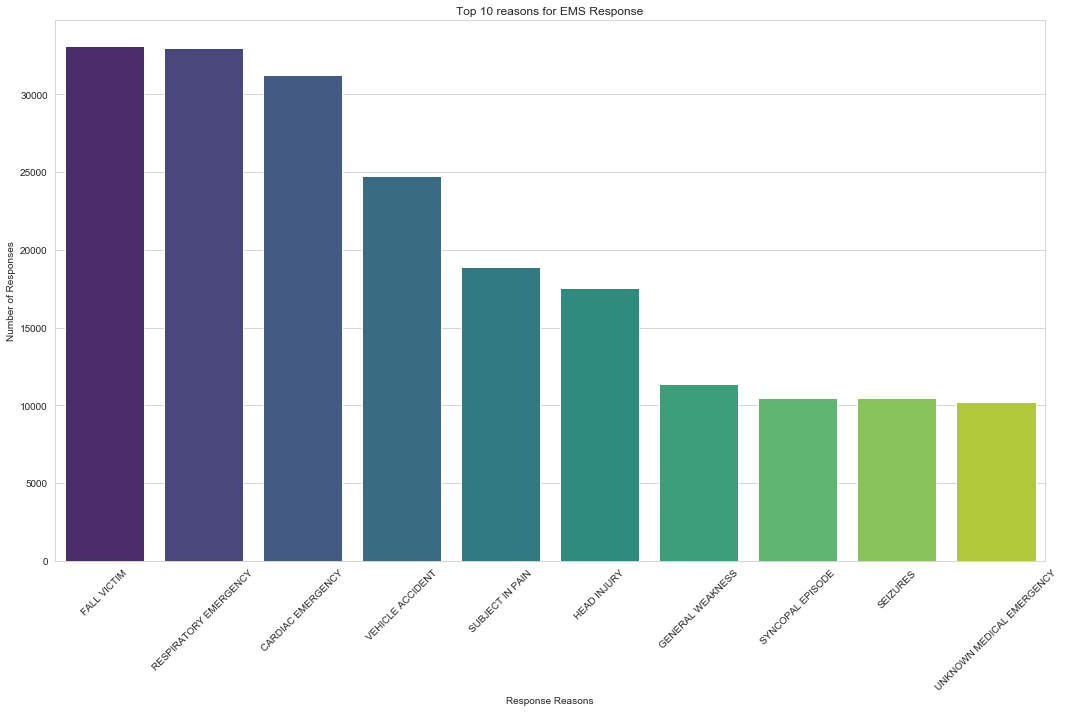

In [198]:
dfems = df[df.responders=='EMS']
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(dfems.response_reason, order=dfems.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for EMS Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

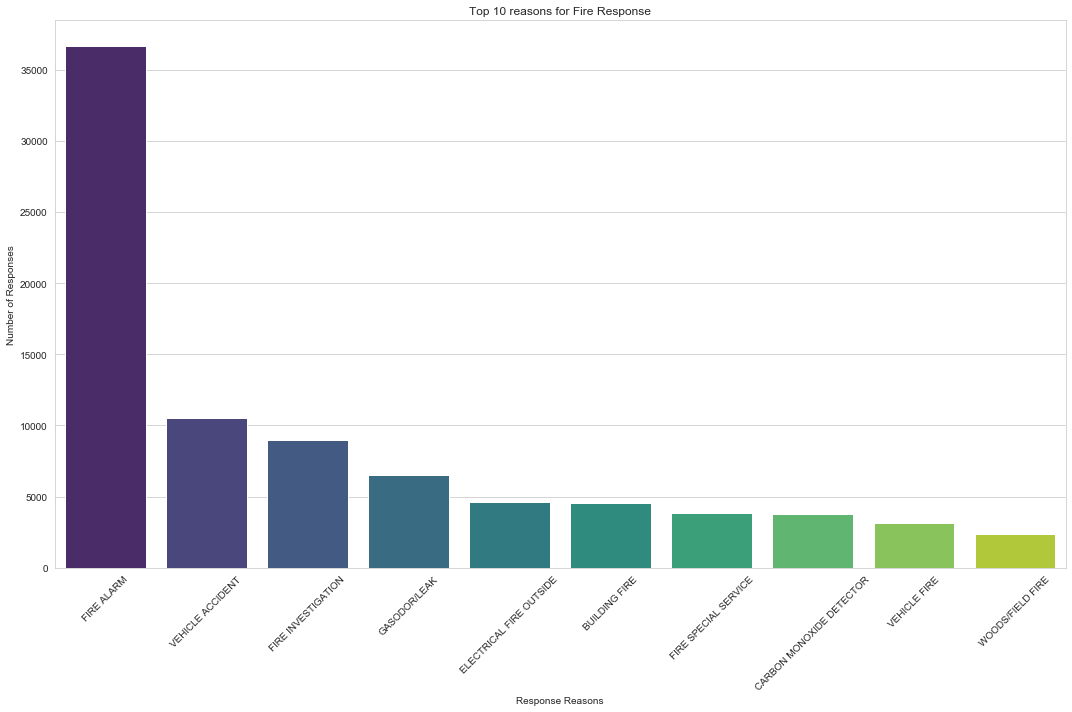

In [199]:
dffire = df[df.responders=='Fire']
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(dffire.response_reason, order=dffire.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for Fire Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

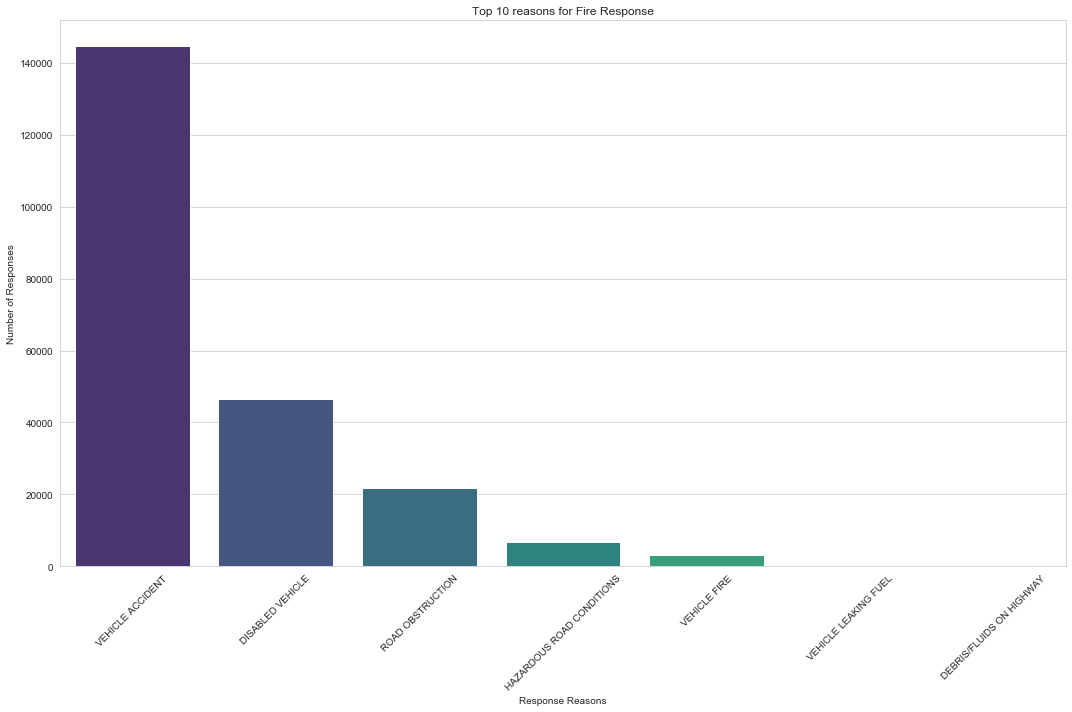

In [202]:
dftraffic = df[df.responders=='Traffic']
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
countgraph = sns.countplot(dftraffic.response_reason, order=dftraffic.response_reason.value_counts().iloc[:10].index,palette='viridis')
countgraph.set_title('Top 10 reasons for Fire Response')
countgraph.set_xlabel('Response Reasons')
countgraph.set_ylabel('Number of Responses')
plt.tight_layout()
plt.show()

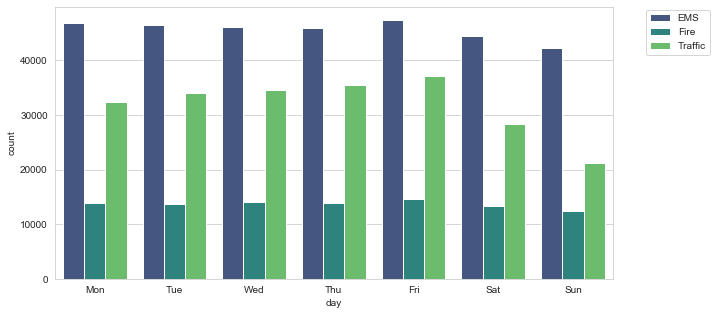

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(x='day',data=df,hue='responders',palette='viridis',order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.legend(bbox_to_anchor=(1.05, 1.009), loc=2)
plt.show()

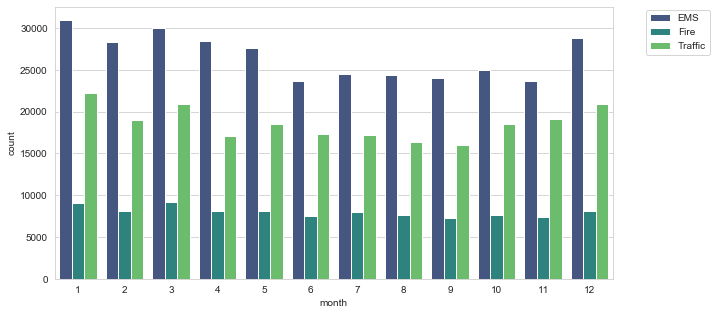

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x='month',data=df,hue='responders',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.009), loc=2)
plt.show()

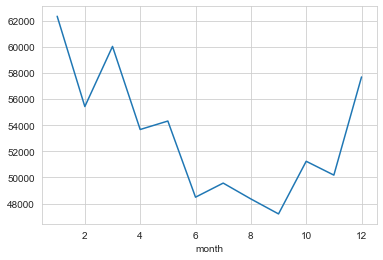

In [75]:
bymonth = df.groupby('month').count()
bymonth['responders'].plot(grid=True)

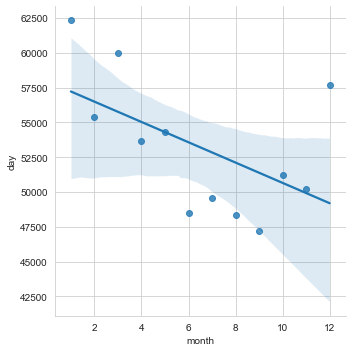

In [76]:
sns.lmplot(x='month',y='day',data=bymonth.reset_index())

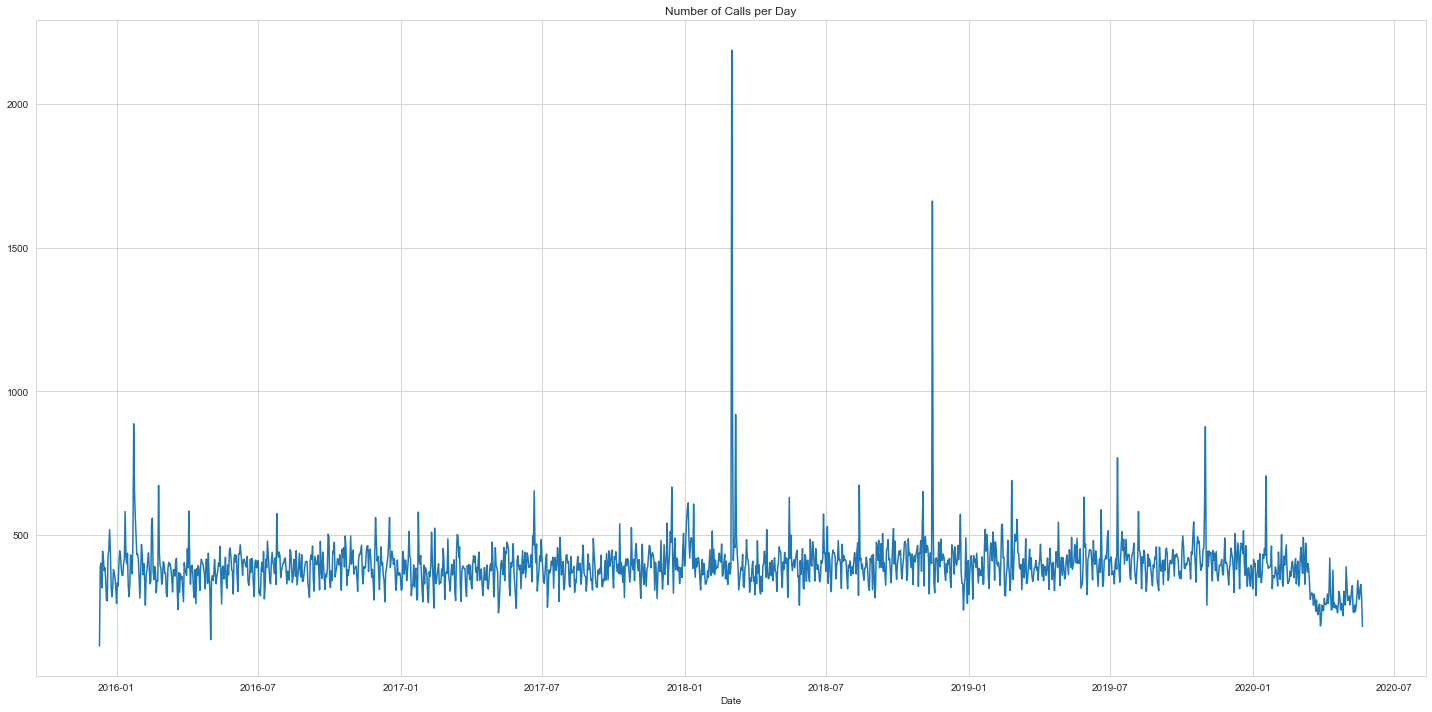

In [83]:
df['Date']=df.timeStamp.apply(lambda x:x.date())
plt.figure(figsize=(20,10))
x = df.groupby('Date').count()['responders'].plot()
x.set_title('Number of Calls per Day')
plt.tight_layout()

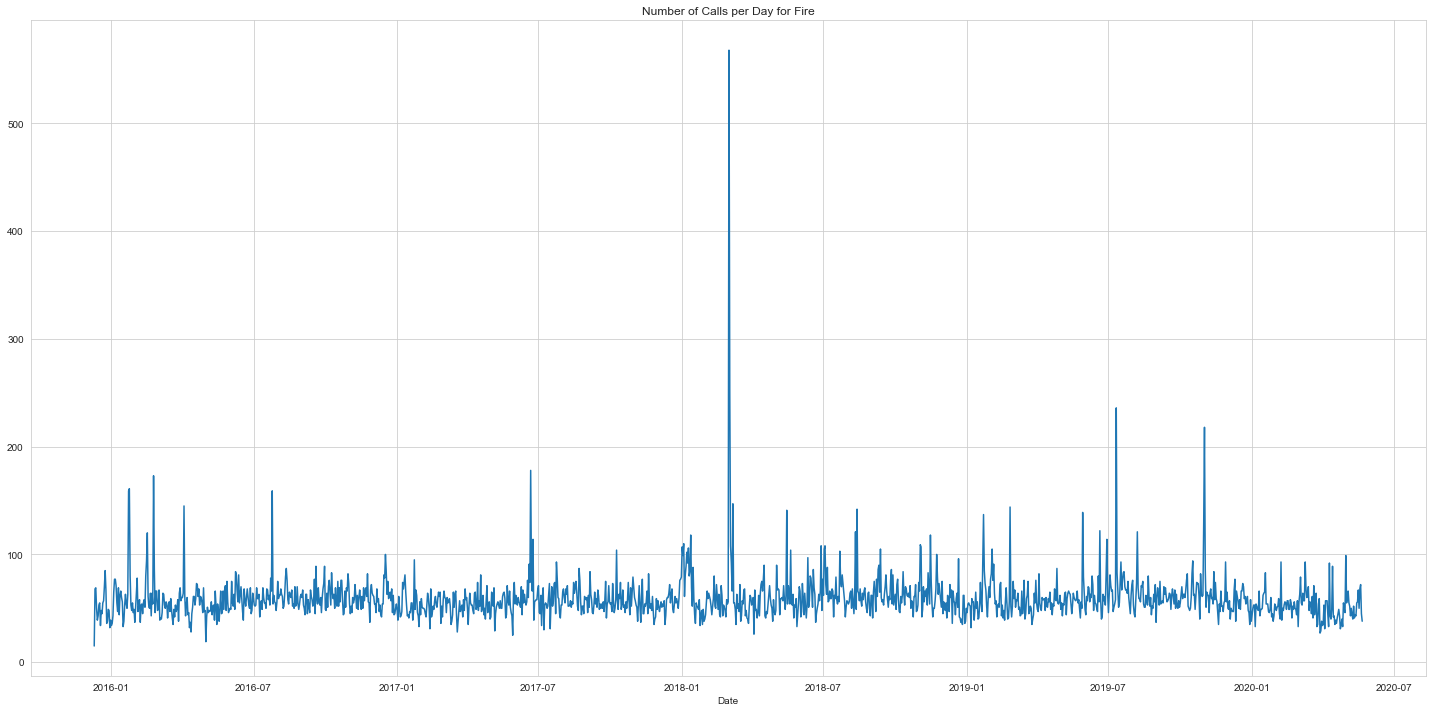

In [85]:
plt.figure(figsize=(20,10))
FirePlot = df[df.responders=='Fire'].groupby('Date').count()['responders'].plot()
FirePlot.set_title('Number of Calls per Day for Fire')
plt.tight_layout()

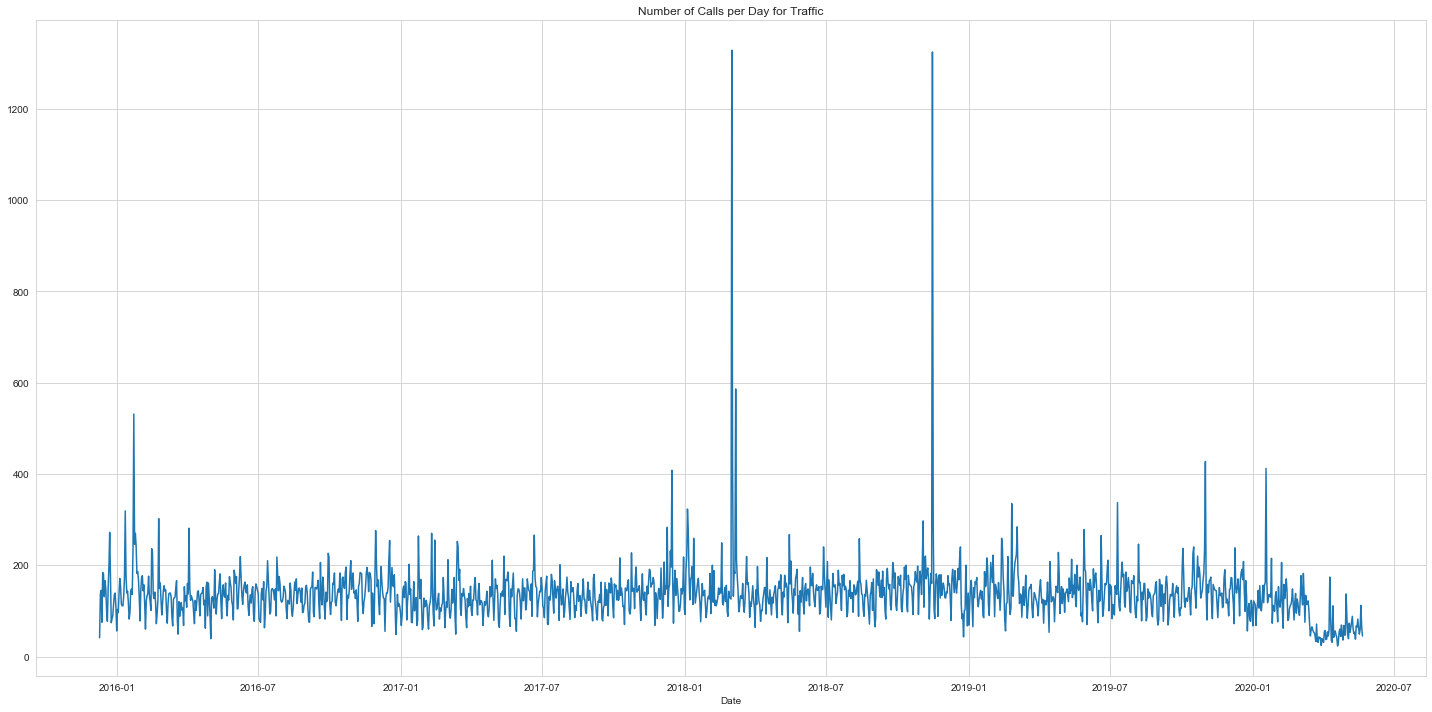

In [86]:
plt.figure(figsize=(20,10))
FirePlot = df[df.responders=='Traffic'].groupby('Date').count()['responders'].plot()
FirePlot.set_title('Number of Calls per Day for Traffic')
plt.tight_layout()

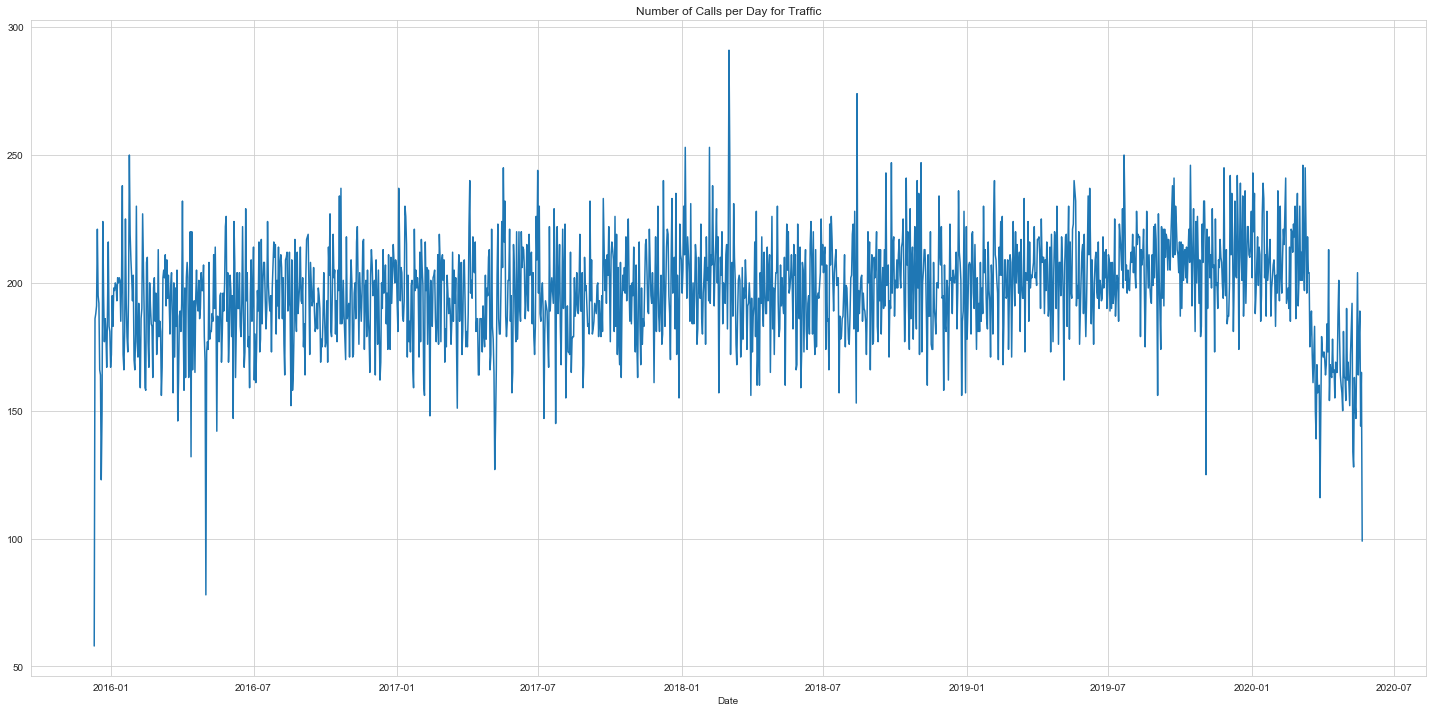

In [87]:
plt.figure(figsize=(20,10))
FirePlot = df[df.responders=='EMS'].groupby('Date').count()['responders'].plot()
FirePlot.set_title('Number of Calls per Day for Traffic')
plt.tight_layout()

In [88]:
dayhour = df.groupby(by=['day','hour']).count()['responders'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,1905,1560,1387,1255,1276,1576,2587,4032,4873,5109,...,6129,6761,6838,6863,5458,4856,4199,3727,3292,2749
Mon,1820,1496,1311,1229,1292,1776,2597,4315,5368,5552,...,5446,5967,6132,6195,5244,4324,3632,3116,2558,1994
Sat,2336,1976,1818,1535,1389,1510,1811,2409,3339,4173,...,5213,4975,5018,4995,4802,4596,3975,3741,3094,2850
Sun,2338,2068,1874,1558,1419,1423,1679,2315,2906,3591,...,4544,4301,4386,4338,4221,4001,3594,3012,2506,2227
Thu,1648,1353,1357,1187,1217,1707,2727,4324,5170,5219,...,5855,6232,6145,6712,5315,4535,3925,3361,2727,2267


In [89]:
monthday = df.groupby(by=['day','month']).count()['responders'].unstack()
monthday.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8209,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7607,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,6597,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6191,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8309,7850,6964,7508,6954,7482,8358,8151


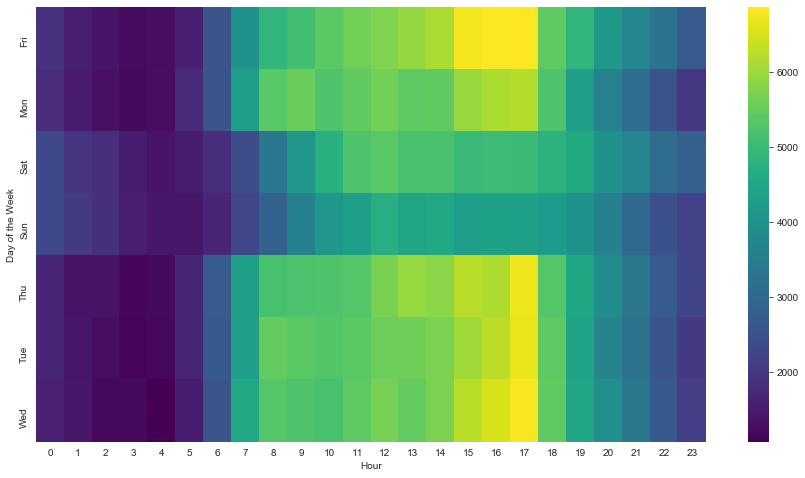

In [90]:
plt.figure(figsize=(15,8))
x = sns.heatmap(dayhour,cmap='viridis')
x.set(xlabel='Hour',ylabel='Day of the Week')
plt.show()

<Figure size 1440x720 with 0 Axes>

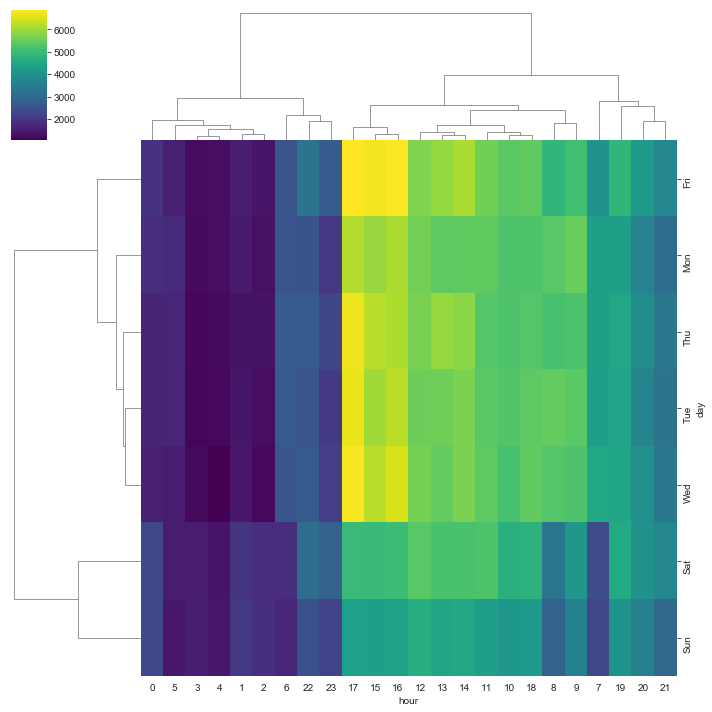

In [91]:
plt.figure(figsize=(20,10))
y = sns.clustermap(dayhour,cmap='viridis')
x.set(xlabel='Hour',ylabel='Day of the Week')
plt.show()

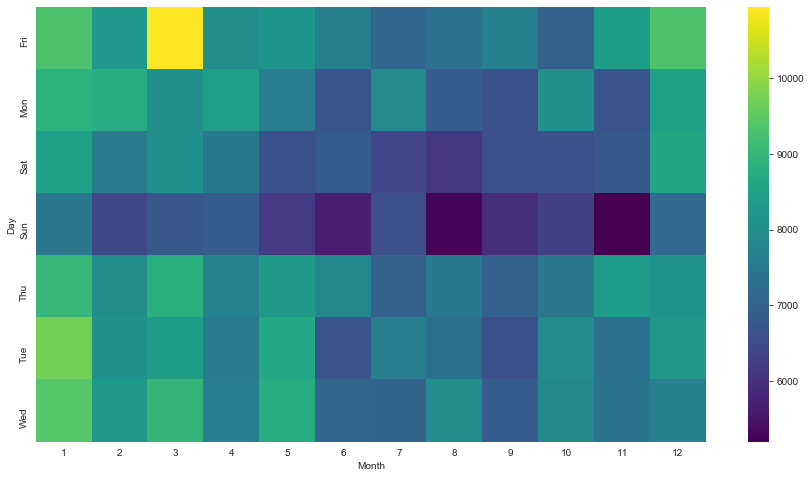

In [92]:
plt.figure(figsize=(15,8))
x = sns.heatmap(monthday,cmap='viridis')
x.set(xlabel='Month',ylabel='Day')
plt.show()

<Figure size 1080x576 with 0 Axes>

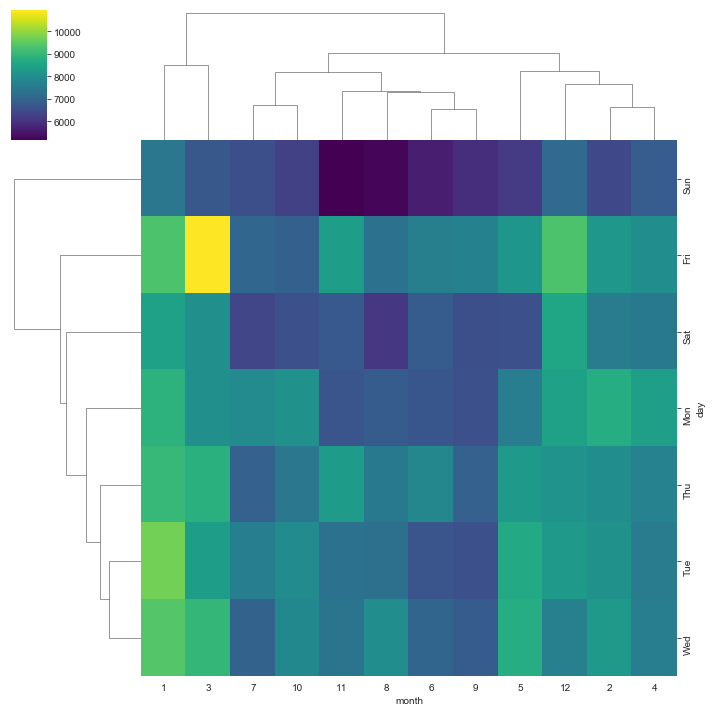

In [212]:
plt.figure(figsize=(15,8))
y = sns.clustermap(monthday,cmap='viridis')
x.set(xlabel='Hour',ylabel='Month')
plt.show()

## END OF MY FIRST KAGGLE DATA SET EDA :)